# Getting Started

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('cosc2789-2021/cleaned_train.csv')
validation = pd.read_csv('cosc2789-2021/cleaned_validation.csv')
test = pd.read_csv('cosc2789-2021/cleaned_test.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438700 entries, 0 to 438699
Data columns (total 46 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Severity                 438700 non-null  int64  
 1   Start_Lat                438700 non-null  float64
 2   Start_Lng                438700 non-null  float64
 3   End_Lat                  438700 non-null  float64
 4   End_Lng                  438700 non-null  float64
 5   Distance(mi)             438700 non-null  float64
 6   Side                     438700 non-null  object 
 7   City                     438700 non-null  object 
 8   County                   438700 non-null  object 
 9   State                    438700 non-null  object 
 10  Zipcode                  438700 non-null  object 
 11  Timezone                 438700 non-null  object 
 12  Airport_Code             438700 non-null  object 
 13  Temperature(F)           438700 non-null  float64
 14  Humi

In [3]:
data.head(3)

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Side,City,County,State,...,Astronomical_Twilight,Start_Time_Month,Start_Time_Year,Start_Time_Hour,End_Time_Month,End_Time_Year,End_Time_Hour,Weather_Timestamp_Month,Weather_Timestamp_Year,Weather_Time_Hour
0,2,39.10148,-84.52341,39.09841,-84.52241,0.219,r,cincinnati,hamilton,oh,...,day,2,2016,6,2,2016,12,2,2016,5
1,2,41.06213,-81.53784,41.06217,-81.53547,0.123,r,akron,summit,oh,...,day,2,2016,6,2,2016,12,2,2016,6
2,2,39.06324,-84.03243,39.06731,-84.05851,1.427,r,williamsburg,clermont,oh,...,day,2,2016,8,2,2016,14,2,2016,8


# Missing Values

In [4]:
print("Total missing values:", data.isna().sum().sum())
print("Total missing values:", test.isna().sum().sum())
print("Total missing values:", validation.isna().sum().sum())

Total missing values: 0
Total missing values: 0
Total missing values: 0


# Unnecessary Columns

In [5]:
{column: len(data[column].unique()) for column in data.columns if data.dtypes[column] == 'object'}

{'Side': 2,
 'City': 8852,
 'County': 1522,
 'State': 49,
 'Zipcode': 83187,
 'Timezone': 4,
 'Airport_Code': 1884,
 'Wind_Direction': 10,
 'Weather_Condition': 11,
 'Sunrise_Sunset': 2,
 'Civil_Twilight': 2,
 'Nautical_Twilight': 2,
 'Astronomical_Twilight': 2}

In [6]:
# select non-numeric columns
categorical = data.select_dtypes(exclude=[np.number])
categorical = categorical.columns.tolist()
print(f'List of non numeric in train dataset is {categorical}\n\n')


# select non-numeric columns
numeric = data.select_dtypes(include=[np.number])
numeric = numeric.columns.tolist()
print(f'List of numeric in test dataset is {numeric}\n\n')

List of non numeric in train dataset is ['Side', 'City', 'County', 'State', 'Zipcode', 'Timezone', 'Airport_Code', 'Wind_Direction', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


List of numeric in test dataset is ['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Start_Time_Month', 'Start_Time_Year', 'Start_Time_Hour', 'End_Time_Month', 'End_Time_Year', 'End_Time_Hour', 'Weather_Timestamp_Month', 'Weather_Timestamp_Year', 'Weather_Time_Hour']




In [7]:
unneeded_columns = ['Side', 'City', 'County', 'State', 'Zipcode', 'Airport_Code', 'Wind_Direction', 'Weather_Condition', 'Amenity', 'Bump',  
                    'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Sunrise_Sunset', 
                    'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

data = data.drop(unneeded_columns, axis=1)
test = test.drop(unneeded_columns, axis=1)
validation = validation.drop(unneeded_columns, axis=1)

# Encoding

In [8]:
data = data.replace([True, False], [1,0])
test = test.replace([True, False], [1,0])
validation = validation.replace([True, False], [1,0])


def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

"""
List of non numeric in train dataset is ['Timezone', 'Crossing', 'Traffic_Signal']


List of numeric in test dataset is ['Severity', 'Weather_Timestamp_Year', 'Start_Lng', 'Distance(mi)', 'Humidity(%)', 'Pressure_bc', 'Wind_Speed_bc']
"""

data = onehot_encode(
    data,
    columns=['Timezone', 'Crossing', 'Traffic_Signal'],
    prefixes=['Timezone', 'Crossing', 'Traffic_Signal']
)

test = onehot_encode(
    test,
    columns=['Timezone', 'Crossing', 'Traffic_Signal'],
    prefixes=['Timezone', 'Crossing', 'Traffic_Signal']
)

validation = onehot_encode(
    validation,
    columns=['Timezone', 'Crossing', 'Traffic_Signal'],
    prefixes=['Timezone', 'Crossing', 'Traffic_Signal']
)

In [9]:
data.head(3)

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),...,Weather_Timestamp_Year,Weather_Time_Hour,Timezone_us/central,Timezone_us/eastern,Timezone_us/mountain,Timezone_us/pacific,Crossing_0,Crossing_1,Traffic_Signal_0,Traffic_Signal_1
0,2,39.10148,-84.52341,39.09841,-84.52241,0.219,36.0,97,29.70,10.0,...,2016,5,0,1,0,0,1,0,1,0
1,2,41.06213,-81.53784,41.06217,-81.53547,0.123,39.0,55,29.65,10.0,...,2016,6,0,1,0,0,1,0,1,0
2,2,39.06324,-84.03243,39.06731,-84.05851,1.427,35.6,100,29.66,10.0,...,2016,8,0,1,0,0,1,0,0,1


### WRITING DATA BACK TO FILES
After completing your analysis and adding new columns, I write the results back to a file and get that data to visualize on Dash App. Otherwise, the data will be lost when the Jupyter Lab shuts down.

In [10]:
# # To write the data from the data frame into a file, use the to_csv function.
# data.to_csv('cosc2789-2021/encoded_train.csv', index=False)
# test.to_csv('cosc2789-2021/encoded_test.csv', index=False)
# validation.to_csv('cosc2789-2021/encoded_validation.csv', index=False)

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151607 entries, 0 to 151606
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       151607 non-null  object 
 1   Start_Lat                151607 non-null  float64
 2   Start_Lng                151607 non-null  float64
 3   End_Lat                  151607 non-null  float64
 4   End_Lng                  151607 non-null  float64
 5   Distance(mi)             151607 non-null  float64
 6   Temperature(F)           151607 non-null  float64
 7   Humidity(%)              151607 non-null  int64  
 8   Pressure(in)             151607 non-null  float64
 9   Visibility(mi)           151607 non-null  float64
 10  Wind_Speed(mph)          151607 non-null  float64
 11  Precipitation(in)        151607 non-null  float64
 12  Start_Time_Month         151607 non-null  int64  
 13  Start_Time_Year          151607 non-null  int64  
 14  Star

# Splitting/Scaling

# 📈 Training a Linear Regression Model

> Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

## X and y arrays

## 🧱 Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [12]:
X = data.drop(['Severity'], axis = 1)
y = data['Severity']

X_train = X
y_train = y

accident_ID = test.ID.to_list()
TEST = test.drop(['ID'], axis = 1)

X_test = validation.drop(['Severity'], axis = 1)
y_test = validation['Severity']

# 📦 Preparing Data For Multiple Linear Regression
> Linear regression is been studied at great length, and there is a lot of literature on how your data must be structured to make best use of the model.

> As such, there is a lot of sophistication when talking about these requirements and expectations which can be intimidating. In practice, you can uses these rules more as rules of thumb when using Ordinary Least Squares Regression, the most common implementation of linear regression.

> Try different preparations of your data using these heuristics and see what works best for your problem.
- **Linear Assumption.** Linear regression assumes that the relationship between your input and output is linear. It does not support anything else. This may be obvious, but it is good to remember when you have a lot of attributes. You may need to transform data to make the relationship linear (e.g. log transform for an exponential relationship).
- **Remove Noise.** Linear regression assumes that your input and output variables are not noisy. Consider using data cleaning operations that let you better expose and clarify the signal in your data. This is most important for the output variable and you want to remove outliers in the output variable (y) if possible.
- **Remove Collinearity.** Linear regression will over-fit your data when you have highly correlated input variables. Consider calculating pairwise correlations for your input data and removing the most correlated.
- **Gaussian Distributions.** Linear regression will make more reliable predictions if your input and output variables have a Gaussian distribution. You may get some benefit using transforms (e.g. log or BoxCox) on you variables to make their distribution more Gaussian looking.
- **Rescale Inputs:** Linear regression will often make more reliable predictions if you rescale input variables using standardization or normalization.

In [13]:
%%time

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)
TEST = pipeline.fit_transform(TEST)

CPU times: user 270 ms, sys: 57.7 ms, total: 328 ms
Wall time: 327 ms


## ✔️ Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

> - **Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

> - **Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

> - **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

> - **Residuals** (R2):

> 📌 Comparing these metrics:
- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.
- **R2** is independent of each other, independent of x, normally distributed, common variance, have 0 mean

> All of these are **loss functions**, because we want to minimize them.

In [14]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

# ✔️ Linear Regression

In [15]:
%%time

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

CPU times: user 1.46 s, sys: 40.6 ms, total: 1.5 s
Wall time: 265 ms


LinearRegression(normalize=True)

## ✔️ Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [16]:
# print the intercept
print(lin_reg.intercept_)

2.24361454233075


In [17]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Start_Lat,7.234767e-01
Start_Lng,5.654346e-01
End_Lat,-6.842308e-01
End_Lng,-4.857693e-01
Distance(mi),7.854709e-02
Temperature(F),1.166318e-02
Humidity(%),1.491427e-02
Pressure(in),-3.994135e-03
Visibility(mi),8.933942e-03
Wind_Speed(mph),-4.529543e-03


> Interpreting the coefficients:
- Holding all other features fixed, a 1 unit increase in **Distance(mi)** is associated with an **increase of \0.087860**.
- Holding all other features fixed, a 1 unit increase in **Temperature(F)** is associated with an **decrease of \-0.014064**.

## ✔️ Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [18]:
%%time

pred = lin_reg.predict(X_test)

CPU times: user 39.8 ms, sys: 4.36 ms, total: 44.1 ms
Wall time: 4.42 ms


In [19]:
# import hvplot.pandas

# pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')

**Residual Histogram**

In [20]:
# pd.DataFrame({'Error Values': (y_test - pred)}).hvplot.kde()

In [21]:
%%time

test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.3853167509259756
MSE: 0.32530785796818285
RMSE: 0.5703576579377039
R2 Square 0.12541345874523124
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.38763030745774285
MSE: 0.32750736515268436
RMSE: 0.5722825920405795
R2 Square 0.12594234093292667
__________________________________
CPU times: user 263 ms, sys: 9.78 ms, total: 273 ms
Wall time: 27.2 ms


In [22]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.385317,0.325308,0.570358,0.125413,-0.091373


In [23]:
%%time

y_predict_model_lin_reg = lin_reg.predict(TEST)

output = pd.DataFrame({"ID": accident_ID, "Severity": y_predict_model_lin_reg})

output.to_csv('submission_lin_reg.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!
CPU times: user 2.04 s, sys: 48.3 ms, total: 2.09 s
Wall time: 286 ms


# Regularization Techniques

* Linear regression works by selecting coefficients for each independent variable that minimizes a loss function. However, if the coefficients are too large, it can lead to model over-fitting on the training dataset. Such a model will not generalize well on the unseen data. To overcome this shortcoming, we do regularization which penalizes large coefficients. The following are the regularization algorithms.

#### Pros of Regularization

--> We can use a regularized model to reduce the dimensionality of the training dataset. Dimensionality reduction is important because of three main reasons:

--> Prevents Overfitting: A high-dimensional dataset having too many features can sometimes lead to overfitting (model captures both real and random effects).

--> Simplicity: An over-complex model having too many features can be hard to interpret especially when features are correlated with each other.

--> Computational Efficiency: A model trained on a lower dimensional dataset is computationally efficient (execution of algorithm requires less computational time).


#### Cons of Regularization

--> Regularization leads to dimensionality reduction, which means the machine learning model is built using a lower dimensional dataset. This generally leads to a high bias errror.

--> If regularization is performed before training the model, a perfect balance between bias-variance tradeoff must be used.


# ✔️ Ridge Regression

> Source: [scikit-learn](http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)

> Ridge regression addresses some of the problems of **Ordinary Least Squares** by imposing a penalty on the size of coefficients. The ridge coefficients minimize a penalized residual sum of squares,

$$\min_{w}\big|\big|Xw-y\big|\big|^2_2+\alpha\big|\big|w\big|\big|^2_2$$

> $\alpha>=0$ is a complexity parameter that controls the amount of shrinkage: the larger the value of $\alpha$, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

> Ridge regression is an L2 penalized model. Add the squared sum of the weights to the least-squares cost function.
***

#### Pros

--> Avoids overfitting a model.

--> The ridge estimator is preferably good at improving the least-squares estimate when there is multicollinearity.


#### Cons

--> They include all the predictors in the final model.

--> They are unable to perform feature selection.

--> They shrink the coefficients towards zero.

--> They trade the variance for bias.

In [24]:
%%time

from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.3852794462053373
MSE: 0.3253366430810204
RMSE: 0.5703828916447445
R2 Square 0.1253360702910039
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.38759830419573604
MSE: 0.327554370098635
RMSE: 0.5723236585173069
R2 Square 0.12581689327161072
__________________________________
CPU times: user 428 ms, sys: 14.1 ms, total: 442 ms
Wall time: 79 ms


In [25]:
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.385317,0.325308,0.570358,0.125413,-0.091373
1,Ridge Regression,0.385279,0.325337,0.570383,0.125336,-0.091362


In [26]:
%%time

y_predict_Ridge = model.predict(TEST)

output = pd.DataFrame({"ID": accident_ID, "Severity": y_predict_Ridge})

output.to_csv('submission_Ridge.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!
CPU times: user 2.04 s, sys: 26.4 ms, total: 2.07 s
Wall time: 252 ms


# ✔️ LASSO Regression

> A linear model that estimates sparse coefficients.

> Mathematically, it consists of a linear model trained with $\ell_1$ prior as regularizer. The objective function to minimize is:

$$\min_{w}\frac{1}{2n_{samples}} \big|\big|Xw - y\big|\big|_2^2 + \alpha \big|\big|w\big|\big|_1$$

> The lasso estimate thus solves the minimization of the least-squares penalty with $\alpha \big|\big|w\big|\big|_1$ added, where $\alpha$ is a constant and $\big|\big|w\big|\big|_1$ is the $\ell_1-norm$ of the parameter vector.
***

#### Pros

--> Avoids overfitting a model.

--> The ridge estimator is preferably good at improving the least-squares estimate when there is multicollinearity.


#### Cons

--> They include all the predictors in the final model.

--> They are unable to perform feature selection.

--> They shrink the coefficients towards zero.

--> They trade the variance for bias.


In [27]:
%%time

from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.430101683556494
MSE: 0.36924023658161503
RMSE: 0.607651410416873
R2 Square 0.007301749730275309
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.4319814619249655
MSE: 0.3719711859477316
RMSE: 0.6098944055717609
R2 Square 0.007276481008895885
__________________________________
CPU times: user 417 ms, sys: 17.3 ms, total: 434 ms
Wall time: 76.9 ms


In [28]:
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.385317,0.325308,0.570358,0.125413,-0.091373
1,Ridge Regression,0.385279,0.325337,0.570383,0.125336,-0.091362
2,Lasso Regression,0.430102,0.369240,0.607651,0.007302,-0.304343


In [29]:
%%time

y_predict_Lasso = model.predict(TEST)

output = pd.DataFrame({"ID": accident_ID, "Severity": y_predict_Lasso})

output.to_csv('submission_lasso.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!
CPU times: user 2.03 s, sys: 32.5 ms, total: 2.06 s
Wall time: 256 ms


# ✔️ Elastic Net

> A linear regression model trained with L1 and L2 prior as regularizer. 

> This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. 

> Elastic-net is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.

> A practical advantage of trading-off between Lasso and Ridge is it allows Elastic-Net to inherit some of Ridge’s stability under rotation.

> The objective function to minimize is in this case

$$\min_{w}{\frac{1}{2n_{samples}} \big|\big|X w - y\big|\big|_2 ^ 2 + \alpha \rho \big|\big|w\big|\big|_1 +
\frac{\alpha(1-\rho)}{2} \big|\big|w\big|\big|_2 ^ 2}$$
***

#### Pros
--> Doesn’t have the problem of selecting more than n predictors when n<<p, whereas LASSO saturates when n<<p.

#### Cons
--> Computationally more expensive than LASSO or Ridge.

In [30]:
%%time 

from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.4187296784429212
MSE: 0.3553239461566491
RMSE: 0.5960905519773393
R2 Square 0.04471554104133013
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.4209772796182415
MSE: 0.35796199800823664
RMSE: 0.5982992545609903
R2 Square 0.04466445855901002
__________________________________
CPU times: user 1.33 s, sys: 17.5 ms, total: 1.35 s
Wall time: 190 ms


In [31]:
results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.385317,0.325308,0.570358,0.125413,-0.091373
1,Ridge Regression,0.385279,0.325337,0.570383,0.125336,-0.091362
2,Lasso Regression,0.430102,0.369240,0.607651,0.007302,-0.304343
3,Elastic Net Regression,0.418730,0.355324,0.596091,0.044716,-0.322343


In [32]:
%%time

y_predict_ElasticNet = model.predict(TEST)

output = pd.DataFrame({"ID": accident_ID, "Severity": y_predict_ElasticNet})

output.to_csv('submission_ElasticNet.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!
CPU times: user 2.04 s, sys: 13.9 ms, total: 2.05 s
Wall time: 238 ms


# ✔️ Polynomial Regression
> Source: [scikit-learn](http://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions)

***

> One common pattern within machine learning is to use linear models trained on nonlinear functions of the data. This approach maintains the generally fast performance of linear methods, while allowing them to fit a much wider range of data.

> For example, a simple linear regression can be extended by constructing polynomial features from the coefficients. In the standard linear regression case, you might have a model that looks like this for two-dimensional data:

$$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2$$

> If we want to fit a paraboloid to the data instead of a plane, we can combine the features in second-order polynomials, so that the model looks like this:

$$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1 x_2 + w_4 x_1^2 + w_5 x_2^2$$

> The (sometimes surprising) observation is that this is still a linear model: to see this, imagine creating a new variable

$$z = [x_1, x_2, x_1 x_2, x_1^2, x_2^2]$$

> With this re-labeling of the data, our problem can be written

$$\hat{y}(w, x) = w_0 + w_1 z_1 + w_2 z_2 + w_3 z_3 + w_4 z_4 + w_5 z_5$$

> We see that the resulting polynomial regression is in the same class of linear models we’d considered above (i.e. the model is linear in w) and can be solved by the same techniques. By considering linear fits within a higher-dimensional space built with these basis functions, the model has the flexibility to fit a much broader range of data.
***

In [33]:
# %%time

# from sklearn.preprocessing import PolynomialFeatures

# poly_reg = PolynomialFeatures(degree=2)

# X_train_2_d = poly_reg.fit_transform(X_train)
# X_test_2_d = poly_reg.transform(X_test)

# lin_reg = LinearRegression(normalize=True)
# lin_reg.fit(X_train_2_d,y_train)

# test_pred = lin_reg.predict(X_test_2_d)
# train_pred = lin_reg.predict(X_train_2_d)

# print('Test set evaluation:\n_____________________________________')
# print_evaluate(y_test, test_pred)
# print('====================================')
# print('Train set evaluation:\n_____________________________________')
# print_evaluate(y_train, train_pred)

In [34]:
# results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]], 
#                             columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
# results_df = results_df.append(results_df_2, ignore_index=True)
# results_df

In [35]:
# %%time

# y_predict_poly_reg = lin_reg.predict(TEST)

# output = pd.DataFrame()
# output['ID'] = accident_ID
# output['Severity'] = y_predict_poly_reg

# output.to_csv('submission_poly_reg.csv', index=False)
# print("Submission was successfully saved!")

# ✔️ Stochastic Gradient Descent

> Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Sescent is to tweak parameters iteratively in order to minimize a cost function. Gradient Descent measures the local gradient of the error function with regards to the parameters vector, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum.

In [36]:
%%time

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.38522408281901527
MSE: 0.3253491415906955
RMSE: 0.5703938477847526
R2 Square 0.12530246818739688
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.3875512023674647
MSE: 0.32757176150470674
RMSE: 0.5723388519965308
R2 Square 0.12577047876831582
__________________________________
CPU times: user 18.6 s, sys: 22.4 ms, total: 18.7 s
Wall time: 18.4 s


In [37]:
results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.385317,0.325308,0.570358,0.125413,-0.091373
1,Ridge Regression,0.385279,0.325337,0.570383,0.125336,-0.091362
2,Lasso Regression,0.430102,0.369240,0.607651,0.007302,-0.304343
3,Elastic Net Regression,0.418730,0.355324,0.596091,0.044716,-0.322343
4,Stochastic Gradient Descent,0.385224,0.325349,0.570394,0.125302,0.000000


In [38]:
y_test

0         2
1         3
2         2
3         3
4         2
         ..
149717    2
149718    2
149719    2
149720    2
149721    2
Name: Severity, Length: 149722, dtype: int64

In [39]:
train_pred

array([2.71166357, 2.71281759, 2.72428767, ..., 2.10403941, 1.82931094,
       2.071749  ])

In [40]:
test_pred

array([2.69931334, 2.77740844, 2.83606316, ..., 1.87414237, 2.14977848,
       2.17447062])

In [41]:
X_train

array([[ 0.42209414,  0.76827295,  0.42148414, ..., -0.24477601,
         0.35342509, -0.35342509],
       [ 0.80233005,  0.92985185,  0.80232369, ..., -0.24477601,
         0.35342509, -0.35342509],
       [ 0.41467812,  0.79484477,  0.4154528 , ..., -0.24477601,
        -2.82945393,  2.82945393],
       ...,
       [-0.63579289,  1.06806695, -0.63508885, ..., -0.24477601,
         0.35342509, -0.35342509],
       [ 0.33513664, -1.22058291,  0.33507691, ..., -0.24477601,
        -2.82945393,  2.82945393],
       [ 1.48290355, -1.06426496,  1.48299411, ..., -0.24477601,
         0.35342509, -0.35342509]])

In [42]:
y_train

0         2
1         2
2         2
3         2
4         2
         ..
438695    2
438696    2
438697    2
438698    2
438699    2
Name: Severity, Length: 438700, dtype: int64

In [43]:
%%time

y_predict_poly_sgd_reg = sgd_reg.predict(TEST)

output = pd.DataFrame({"ID": accident_ID, "Severity": y_predict_poly_sgd_reg})

output.to_csv('submission_sgd_reg.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!
CPU times: user 2.04 s, sys: 33.2 ms, total: 2.07 s
Wall time: 269 ms


In [44]:
y_predict_poly_sgd_reg

array([2.70597405, 2.71788692, 2.7816361 , ..., 1.88807977, 2.13967544,
       2.12079058])

# ✔️ Artficial Neural Network

In [45]:
%%time

# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(optimizer=Adam(0.00001), loss='mse')

r = model.fit(X_train, y_train,
              validation_data=(X_test,y_test),
              batch_size=1,
              epochs=20)

Defaulting to user installation because normal site-packages is not writeable
Epoch 1/20
438700/438700 [==============================] - 352s 803us/step - loss: 0.3386 - val_loss: 0.2940
Epoch 2/20
438700/438700 [==============================] - 346s 788us/step - loss: 0.2950 - val_loss: 0.2851
Epoch 3/20
438700/438700 [==============================] - 341s 776us/step - loss: 0.2876 - val_loss: 0.2869
Epoch 4/20
438700/438700 [==============================] - 341s 777us/step - loss: 0.2829 - val_loss: 0.2773
Epoch 5/20
438700/438700 [==============================] - 341s 777us/step - loss: 0.2799 - val_loss: 0.2759
Epoch 6/20
438700/438700 [==============================] - 342s 781us/step - loss: 0.2776 - val_loss: 0.2729
Epoch 7/20
438700/438700 [==============================] - 349s 795us/step - loss: 0.2753 - val_loss: 0.2707
Epoch 8/20
438700/438700 [==============================] - 348s 793us/step - loss: 0.2735 - val_loss: 0.2693
Epoch 9/20
438700/438700 [================

**---->OBSERVATION**

In [46]:
# pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')

In [47]:
# pd.DataFrame(r.history)

In [48]:
# pd.DataFrame(r.history).hvplot.line(y=['loss', 'val_loss'])

In [49]:
%%time

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.3019325046679614
MSE: 0.2625949803777413
RMSE: 0.5124402212724342
R2 Square 0.29401632941219935
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.3016122832640255
MSE: 0.25808541410669983
RMSE: 0.5080210764394523
R2 Square 0.3112169163331887
__________________________________
CPU times: user 13.6 s, sys: 2.63 s, total: 16.2 s
Wall time: 11.2 s


In [50]:
results_df_2 = pd.DataFrame(data=[["Artificial Neural Network", *evaluate(y_test, test_pred), 0]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.385317,0.325308,0.570358,0.125413,-0.091373
1,Ridge Regression,0.385279,0.325337,0.570383,0.125336,-0.091362
2,Lasso Regression,0.430102,0.369240,0.607651,0.007302,-0.304343
3,Elastic Net Regression,0.418730,0.355324,0.596091,0.044716,-0.322343
4,Stochastic Gradient Descent,0.385224,0.325349,0.570394,0.125302,0.000000
5,Artificial Neural Network,0.301933,0.262595,0.512440,0.294016,0.000000


In [51]:
y_predict_model_arti = model.predict(TEST)

output = pd.DataFrame()
output['ID'] = accident_ID
output['Severity'] = y_predict_model_arti

output.to_csv('submission_arti.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!


# ✔️ Random Forest Regressor

In [52]:
%%time

from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.2523832425404848
MSE: 0.2033751729912665
RMSE: 0.45097136604363974
R2 Square 0.4532281198663245
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.09691378742815826
MSE: 0.03025646314054803
RMSE: 0.1739438505396153
R2 Square 0.919250996593779
__________________________________
CPU times: user 1h, sys: 3.99 s, total: 1h 4s
Wall time: 1h 20s


In [53]:
results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.385317,0.325308,0.570358,0.125413,-0.091373
1,Ridge Regression,0.385279,0.325337,0.570383,0.125336,-0.091362
2,Lasso Regression,0.430102,0.369240,0.607651,0.007302,-0.304343
3,Elastic Net Regression,0.418730,0.355324,0.596091,0.044716,-0.322343
4,Stochastic Gradient Descent,0.385224,0.325349,0.570394,0.125302,0.000000
5,Artificial Neural Network,0.301933,0.262595,0.512440,0.294016,0.000000
6,Random Forest Regressor,0.252383,0.203375,0.450971,0.453228,0.000000


In [54]:
y_predict_rf_reg = rf_reg.predict(TEST)

output = pd.DataFrame()
output['ID'] = accident_ID
output['Severity'] = y_predict_rf_reg

output.to_csv('submission_rf_reg.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!


# 📊 Models Comparison

<AxesSubplot:ylabel='Model'>

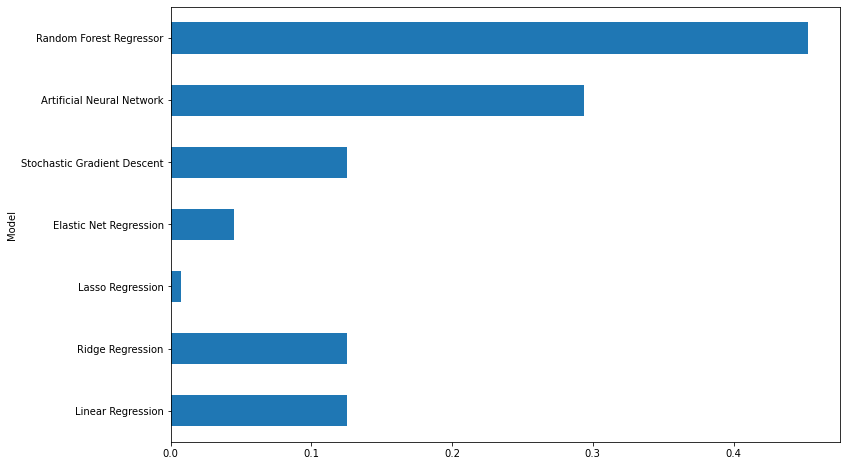

In [55]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))

## Observe TEST predictions

In [56]:
# All = pd.DataFrame()
# output['ID'] = accident_ID
# # All = pd.DataFrame({"ID": accident_ID, "LinearRegression": y_predict_model_lin_reg, "SGDRegressor": y_predict_poly_sgd_reg, "ArtificialNeuralNetwork": y_predict_model_arti, "RandomForestRegressor":y_predict_rf_reg})
# All['Voting']=All[[accident_ID, y_predict_model_lin_reg, y_predict_poly_sgd_reg, y_predict_model_arti, y_predict_rf_reg]].mean(axis=1)

# # output.to_csv('submission_arti.csv', index=False)
# All.head(10)

In [57]:
# from matplotlib import pyplot as plt
# disp = 150
# fig, ax = plt.subplots(figsize=(30,10))  
# for col in All.columns[1:].tolist():
#     plt.scatter(x = All[:disp].ID, y= All[:disp][col], alpha=0.8)
#     plt.legend(All.columns[1:].tolist())

# plt.show()

In [58]:
import joblib
 
# Save the model as a pickle in a file
joblib.dump(lin_reg, 'lin_reg.pkl')
joblib.dump(model, 'arti.pkl')
joblib.dump(rf_reg, 'RandomForest.pkl')

INFO:tensorflow:Assets written to: ram://69b7728e-f24d-4060-88e1-f67979d286c9/assets


['RandomForest.pkl']

# 📝 Summary
In this notebook you discovered the linear regression algorithm for machine learning.

You covered a lot of ground including:
> - The common linear regression models (Ridge, Lasso, ElasticNet, ...).
> - The representation used by the model.
> - Learning algorithms used to estimate the coefficients in the model.
> - Rules of thumb to consider when preparing data for use with linear regression.
> - How to evaluate a linear regression model.


# 🔗 References:
- [Scikit-learn library](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)
- [Linear Regression for Machine Learning by Jason Brownlee PhD](https://machinelearningmastery.com/linear-regression-for-machine-learning/)